<a href="https://colab.research.google.com/github/sprabhala-cpu/Machine-Learning/blob/main/mcqresponses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
!wget 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'

--2021-05-12 14:43:37--  https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/master/Assessment/2020/data/MCQResponses.csv [following]
--2021-05-12 14:43:37--  https://raw.githubusercontent.com/tulip-lab/sit742/master/Assessment/2020/data/MCQResponses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1018741 (995K) [text/plain]
Saving to: ‘MCQResponses.csv’

MCQResponses.csv    100%[===================>] 994.86K  --.-KB/s    in 0.02s   

2021-05-12 14:43:37 (43.0 MB/s) - ‘MCQResponses.csv’ saved [1

In [3]:
import pandas as pd
data=pd.read_csv('/content/MCQResponses.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  4327 non-null   object 
 1   Country                       4327 non-null   object 
 2   Age                           4327 non-null   int64  
 3   EmploymentStatus              4327 non-null   object 
 4   CodeWriter                    4327 non-null   object 
 5   CurrentJobTitleSelect         4327 non-null   object 
 6   TitleFit                      4251 non-null   object 
 7   CurrentEmployerType           4275 non-null   object 
 8   MLToolNextYearSelect          4206 non-null   object 
 9   MLMethodNextYearSelect        4170 non-null   object 
 10  LanguageRecommendationSelect  4228 non-null   object 
 11  FormalEducation               4327 non-null   object 
 12  MajorSelect                   3952 non-null   object 
 13  Fir

In [6]:
#statistics
data.describe()

,Age,CompensationAmount
count,4327.000000,4.327000e+03
mean,34.129651,2.891714e+06
std,9.476011,2.946122e+07
min,0.000000,1.090000e+01
25%,27.000000,5.000000e+04
50%,32.000000,1.000000e+05
75%,39.000000,2.200000e+05
max,99.000000,8.000000e+08


In [11]:
print(data.isnull().any())
print(' ')
print(data.isnull().sum())
print('')
print(data.notnull().sum())

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool
 
GenderSelect                      0
Country                           0
Age                               0
EmploymentStatus                  0
CodeWriter                        0
CurrentJobTitleSelect             0
TitleFit                         76
CurrentEmployerType              52
MLToolNextYearSelect            121
MLMethodNextYear

In [13]:
df_demog_ds=data.loc[data['CurrentJobTitleSelect']=='Data Scientist']
#selecting job title data scientist

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


In [20]:
print(df_demog_ds['FormalEducation'].value_counts())
print(' ')
print(df_demog_ds['FormalEducation'].value_counts()/len(df_demog_ds)*100)

Master's degree                                                      635
Doctoral degree                                                      326
Bachelor's degree                                                    252
Professional degree                                                   25
Some college/university study without earning a bachelor's degree     19
I did not complete any formal education past high school               6
Name: FormalEducation, dtype: int64
 
Master's degree                                                      50.277118
Doctoral degree                                                      25.811560
Bachelor's degree                                                    19.952494
Professional degree                                                   1.979414
Some college/university study without earning a bachelor's degree     1.504355
I did not complete any formal education past high school              0.475059
Name: FormalEducation, dtype: float64


In [37]:
import matplotlib.pyplot as plt
education=pd.DataFrame(df_demog_ds['FormalEducation'].value_counts())
education

,FormalEducation
Master's degree,635
Doctoral degree,326
Bachelor's degree,252
Professional degree,25
Some college/university study without earning a bachelor's degree,19
I did not complete any formal education past high school,6


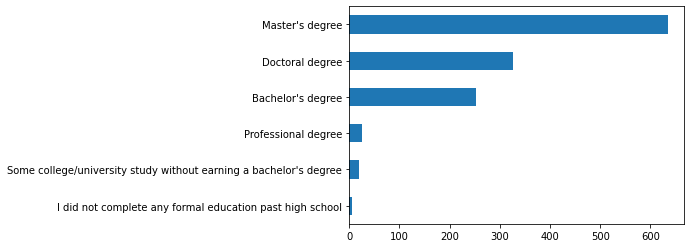

In [49]:
(df_demog_ds['FormalEducation'].value_counts()).sort_values().plot(kind = 'barh')

In [50]:
conversion_df=pd.read_csv('/content/ConversionRates.csv')


In [53]:
conversion_df.drop('Unnamed: 0',axis=1,inplace=True)

In [54]:
conversion_df

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


In [55]:
df_demog_ds.head(3)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
9,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9
10,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8


In [56]:
salary_df=pd.merge(df_demog_ds,conversion_df,left_on='CompensationCurrency',right_on='originCountry',how='inner')

In [57]:
salary_df.head(2)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,originCountry,exchangeRate
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,INR,0.01562
1,Male,India,29,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,Python,Bayesian Methods,R,Master's degree,Computer Science,University courses,120000.0,INR,7,INR,0.01562


In [58]:
salary_df['australian_pay']=salary_df['CompensationAmount']*salary_df['exchangeRate']

In [59]:
salary_df.head(2)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,originCountry,exchangeRate,australian_pay
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,INR,0.01562,1483.9
1,Male,India,29,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,Python,Bayesian Methods,R,Master's degree,Computer Science,University courses,120000.0,INR,7,INR,0.01562,1874.4


In [61]:
salary_df['australian_pay'].describe()

count      1262.000000
mean      80941.171090
std       60806.927249
min           0.060000
25%       34446.431400
50%       71268.060000
75%      116395.188500
max      595884.600000
Name: australian_pay, dtype: float64

In [65]:
Australia_respondes=salary_df.loc[salary_df['Country']=='Australia']

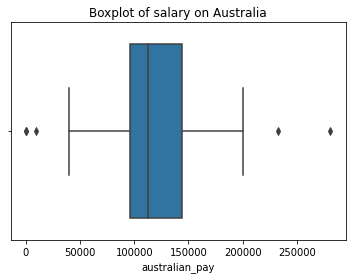

In [70]:

import seaborn as sns
sns.boxplot(x=Australia_respondes['australian_pay'])

plt.title("Boxplot of salary on Australia")
plt.show()

In [71]:
Australia_respondes['australian_pay'].describe()

count        29.00000
mean     119817.97885
std       67153.46513
min          72.20790
25%       96277.20000
50%      112323.40000
75%      144415.80000
max      280808.50000
Name: australian_pay, dtype: float64